# **Exploratory Data Analysis (EDA)**

## **Import necessary libraries**

In [1]:
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Define the paths to the image files**

In [2]:
gen = [glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]

forg = [glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

## **Create a function to load the images**

In [3]:
def load_images(file_list):
    images = []
    for files in file_list:
        for file in files:
            img = cv2.imread(file)
            images.append(img)
    return images

## **Load the images**

In [4]:
gen_imgs = load_images(gen)
forg_imgs = load_images(forg)

## **Determine the number of images in each dataset**

In [5]:
num_gen = sum([len(x) for x in gen])
num_forg = sum([len(x) for x in forg])
print(f"Number of real signatures: {num_gen}")
print(f"Number of forged signatures: {num_forg}")

Number of real signatures: 360
Number of forged signatures: 360


## **Check if the number of real and forged signatures is balanced or not**

In [6]:
if num_gen == num_forg:
    print("The dataset is balanced.")
else:
    print("The dataset is not balanced.")

The dataset is balanced.


## **Calculate the dimensions of the images, their color channels, and pixel values**

In [7]:
gen_shape = [x.shape for x in gen_imgs]
forg_shape = [x.shape for x in forg_imgs]
print("Shape of real images: ", gen_shape[:5])
print("Shape of forged images: ", forg_shape[:5])

gen_color = [x.shape[2] for x in gen_imgs]
forg_color = [x.shape[2] for x in forg_imgs]
print("Color channels of real images: ", gen_color[:5])
print("Color channels of forged images: ", forg_color[:5])

gen_pixels = [x.mean() for x in gen_imgs]
forg_pixels = [x.mean() for x in forg_imgs]
print("Mean pixel values of real images: ", gen_pixels[:5])
print("Mean pixel values of forged images: ", forg_pixels[:5])

Shape of real images:  [(58, 222, 3), (69, 189, 3), (51, 141, 3), (76, 186, 3), (104, 230, 3)]
Shape of forged images:  [(81, 196, 3), (91, 272, 3), (80, 167, 3), (89, 210, 3), (39, 87, 3)]
Color channels of real images:  [3, 3, 3, 3, 3]
Color channels of forged images:  [3, 3, 3, 3, 3]
Mean pixel values of real images:  [244.57510096303199, 243.33545484753213, 238.7995179159134, 243.4405300886625, 243.31145484949832]
Mean pixel values of forged images:  [244.06515075165868, 243.68103587588882, 244.12270459081836, 242.5374710183699, 238.69771097357304]


## **Plot some sample images to visually inspect the data**

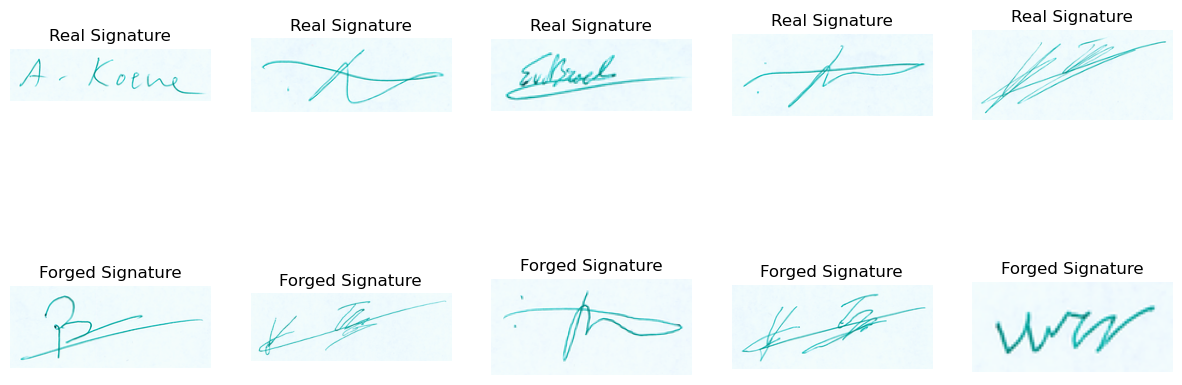

In [8]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    axs[0, i].imshow(cv2.cvtColor(gen_imgs[i], cv2.COLOR_BGR2RGB))
    axs[0, i].set_title("Real Signature")
    axs[0, i].axis("off")
    
    axs[1, i].imshow(cv2.cvtColor(forg_imgs[i], cv2.COLOR_BGR2RGB))
    axs[1, i].set_title("Forged Signature")
    axs[1, i].axis("off")
    
plt.show()

## **Create a dataframe to hold the image data**

In [9]:
image_data = pd.DataFrame(columns=['Type', 'Shape', 'Color Channels', 'Mean Pixel Value'])

## **Add real signature data to the dataframe**

In [10]:
for i in range(len(gen_shape)):
    image_data = image_data.append({'Type': 'Real','Shape': gen_shape[i], 'Color Channels': gen_color[i], 'Mean Pixel Value': gen_pixels[i]}, ignore_index=True)

## **Add forged signature data to the dataframe**

In [11]:
for i in range(len(forg_shape)):
    image_data = image_data.append({'Type': 'Forged', 'Shape': forg_shape[i], 'Color Channels': forg_color[i], 'Mean Pixel Value': forg_pixels[i]}, ignore_index=True)

## **Display summary statistics of the image data**

In [12]:
print(image_data.describe())

       Mean Pixel Value
count        720.000000
mean         243.039370
std            5.213333
min          226.423019
25%          239.804540
50%          242.563931
75%          247.552634
max          252.423212


## **Create histograms to visualize the distribution of the image data**

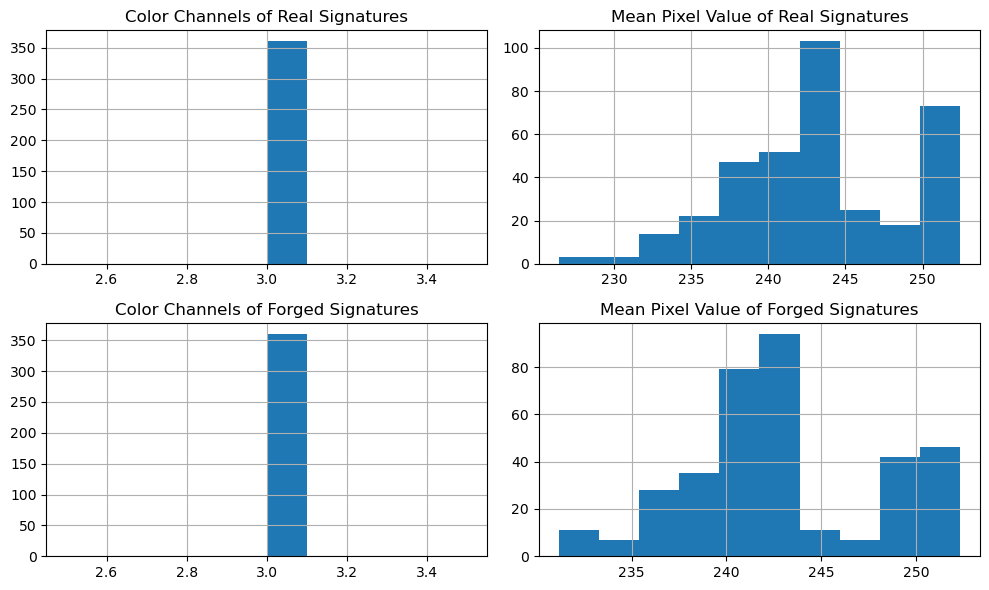

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
image_data[image_data['Type'] == 'Real']['Color Channels'].hist(ax=axs[0, 0])
image_data[image_data['Type'] == 'Forged']['Color Channels'].hist(ax=axs[1, 0])
image_data[image_data['Type'] == 'Real']['Mean Pixel Value'].hist(ax=axs[0, 1])
image_data[image_data['Type'] == 'Forged']['Mean Pixel Value'].hist(ax=axs[1, 1])

axs[0, 0].set_title("Color Channels of Real Signatures")
axs[0, 1].set_title("Mean Pixel Value of Real Signatures")
axs[1, 0].set_title("Color Channels of Forged Signatures")
axs[1, 1].set_title("Mean Pixel Value of Forged Signatures")

plt.tight_layout()
plt.show()

# **Recurrent Neural Networks (RNN)**

# **Bi-directional Recurrent Neural Network (B-RNN)**

11490434/11490434 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                         

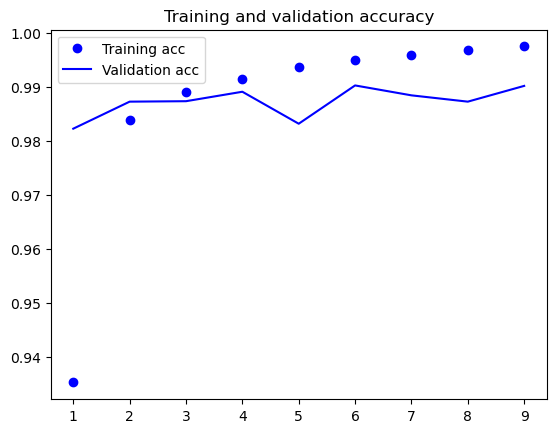

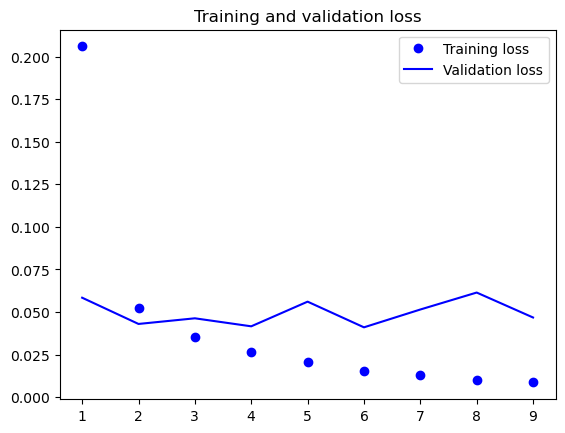

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# load the data
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

# preprocess the data
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# define callbacks
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# train the model
history = model.fit(train_data, train_labels, batch_size=64, epochs=10, validation_split=.2, callbacks=[early_stop])

# plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
# get the final loss and accuracy
final_loss, final_accuracy = model.evaluate(test_data, test_labels)

# print the results in percentage form
print("Final Loss: {:.2f}%".format(final_loss * 100))
print("Final Accuracy: {:.2f}%".format(final_accuracy * 100))

313/313 [==============================] - 2s 6ms/step - loss: 0.0389 - accuracy: 0.9911
Final Loss: 3.89%
Final Accuracy: 99.11%


In [16]:
from tensorflow.keras.models import load_model

model.save('forge_real2.h5')